**Implemented by: Anika Shrivastava**

## **important imports**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import os
import random
import cv2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Input, LeakyReLU, Add, Concatenate, concatenate
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.models import load_model
import math
import pandas as pd
#import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### **drive mounted**

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **reading the images**

In [3]:
def read(path):
    path = path
    dataset = []

    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(path, filename)
            img = image.load_img(image_path,target_size=(256,256,3),color_mode= 'rgb')
            img=image.img_to_array(img)
            img=img/255
            dataset.append(img)
    dataset= np.array(dataset)
    return dataset

### **Dataset BSDS300 can be accessed from the link: https://www.kaggle.com/datasets/adheshgarg/bsds300**

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/BSDS300_all'    # change the path accrodingly
dataset = read(path)

In [5]:
dataset.shape

(300, 256, 256, 3)

In [6]:
def show_img(dataset):
    fig, ax = plt.subplots(1,4)
    fig.set_size_inches(40, 20)
    for i in range(4,8):
        ax[i-4].imshow(dataset[i].reshape(256,256,3))
    plt.show()

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))     #20

In [7]:
train=dataset[0:150]
val=dataset[150:200]
test= dataset[200:300]

## **Experiment-6 (Analyzing the trade-off between reducing bottleneck size and the PSNR of reconstruction)**

Training different autoencoder architecture in order to decrease the bottleneck size, initially decreasing the filter size and later decreasing the no. of filters as well:-
1. Our initial U-net model : 1,31,072
2. 16x16x128 : 32,768
3. 8x8x128 : 8,192
4. 32x32x64 : 65,536
5. 32x32x32 : 32,768
6. 32x32x16 : 16,384
7. 32x32x8 : 8,192
8. 16x16x64 : 16,384
9. 16x16x16 : 4,096
10. 16x16x8 : 2,048
11. 8x8x64 : 4,096
12. 8x8x16 : 1,024
13. 8x8x8 : 512






**The PSNR results for each architecture looks like this:-**

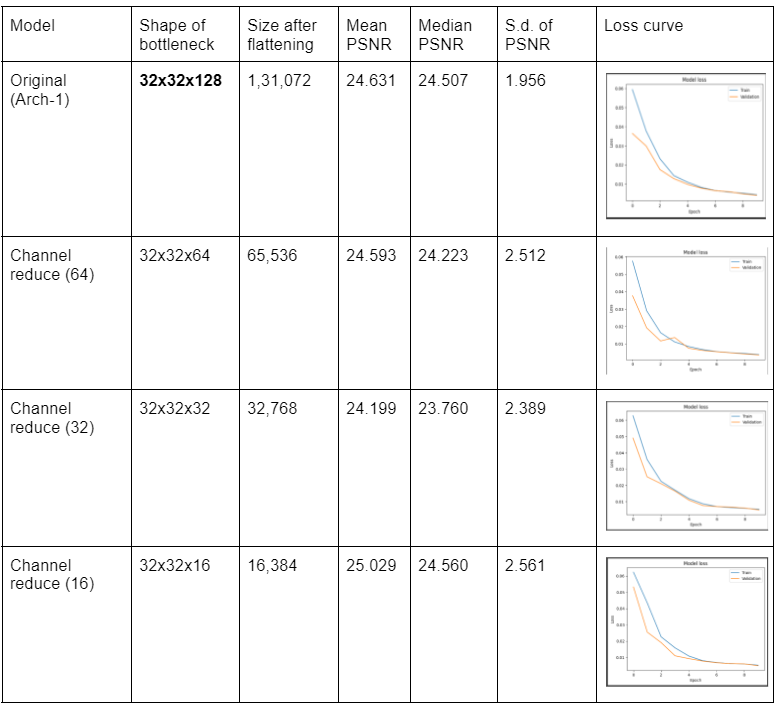
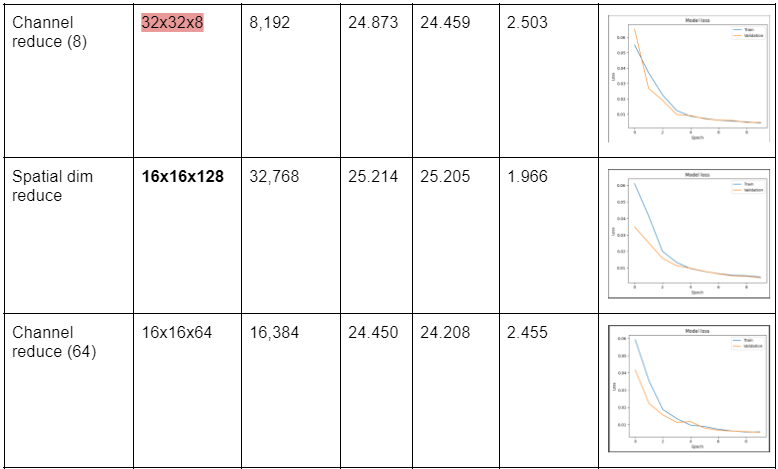
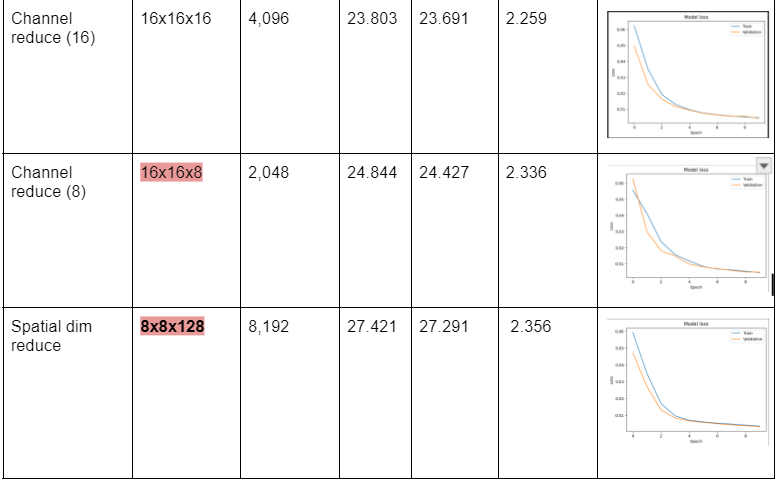
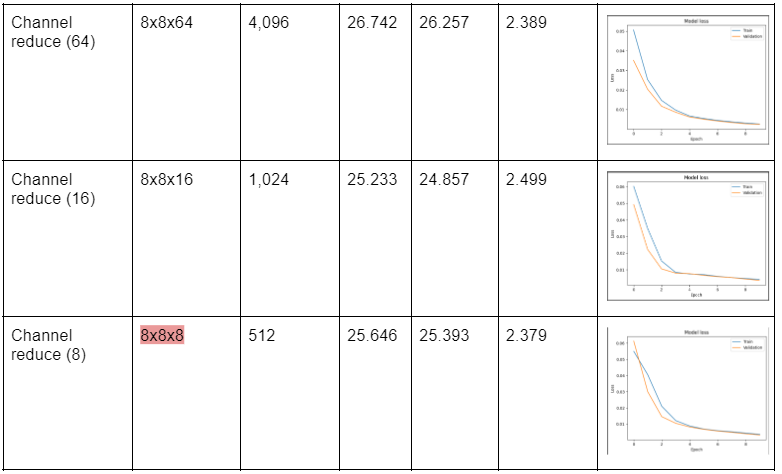

###Architecture1 (32x32x128) : 1,31,072

In [8]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder1 = Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='mse')
autoencoder1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
history= autoencoder1.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 183s 13s/step - loss: 0.0595 - val_loss: 0.0365
Epoch 2/10
13/13 [==============================] - 141s 11s/step - loss: 0.0377 - val_loss: 0.0299
Epoch 3/10
13/13 [==============================] - 142s 11s/step - loss: 0.0232 - val_loss: 0.0175
Epoch 4/10
13/13 [==============================] - 146s 11s/step - loss: 0.0144 - val_loss: 0.0128
Epoch 5/10
13/13 [==============================] - 150s 11s/step - loss: 0.0109 - val_loss: 0.0098
Epoch 6/10
13/13 [==============================] - 142s 11s/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/10
13/13 [==============================] - 146s 11s/step - loss: 0.0066 - val_loss: 0.0065
Epoch 8/10
13/13 [==============================] - 143s 11s/step - loss: 0.0058 - val_loss: 0.0060
Epoch 9/10
13/13 [==============================] - 151s 12s/step - loss: 0.0052 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 155s 12s/step - loss: 0.0044 - val_loss: 0.0041

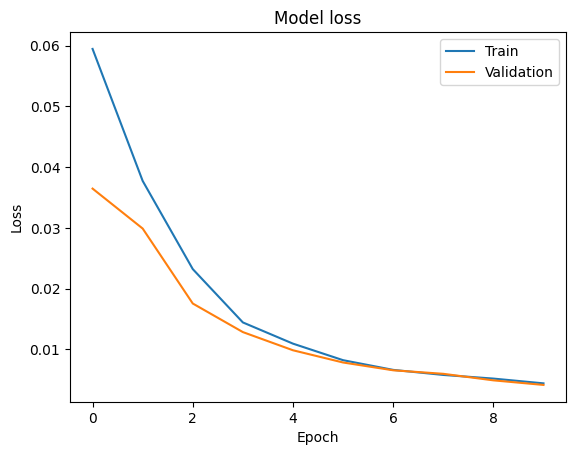

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [10]:
train_pred = autoencoder1.predict(train)

5/5 [==============================] - 55s 11s/step


In [12]:
psnr(train[70],train_pred[70])

27.3086367191266

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:27.308)')

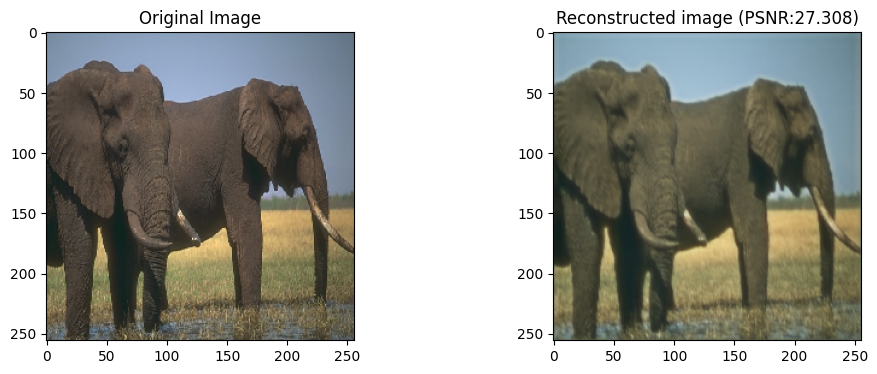

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:27.308)")

In [9]:
autoencoder1.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch1.h5')      # repo contains the weights of the model

In [14]:
test_pred= autoencoder1.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 41s 9s/step


In [15]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.631525426135873
MedianPSNR of test data: 24.50799280357751
Standard-DeviationPSNR of test data: 1.9561695669932782


###Architecture 2: (16x16x128) : 32,768

In [22]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img,decoded)
autoencoder2.compile(optimizer='adam', loss='mse')
autoencoder2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 256, 256, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_23[0][0]']              
                                )                                                           

In [23]:
history= autoencoder2.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 224s 17s/step - loss: 0.0567 - val_loss: 0.0539
Epoch 2/10
13/13 [==============================] - 200s 15s/step - loss: 0.0306 - val_loss: 0.0208
Epoch 3/10
13/13 [==============================] - 201s 15s/step - loss: 0.0176 - val_loss: 0.0144
Epoch 4/10
13/13 [==============================] - 205s 16s/step - loss: 0.0115 - val_loss: 0.0099
Epoch 5/10
13/13 [==============================] - 199s 15s/step - loss: 0.0078 - val_loss: 0.0068
Epoch 6/10
13/13 [==============================] - 205s 16s/step - loss: 0.0061 - val_loss: 0.0062
Epoch 7/10
13/13 [==============================] - 199s 15s/step - loss: 0.0051 - val_loss: 0.0052
Epoch 8/10
13/13 [==============================] - 205s 16s/step - loss: 0.0045 - val_loss: 0.0044
Epoch 9/10
13/13 [==============================] - 199s 15s/step - loss: 0.0041 - val_loss: 0.0037
Epoch 10/10
13/13 [==============================] - 199s 15s/step - loss: 0.0034 - val_loss: 0.0033

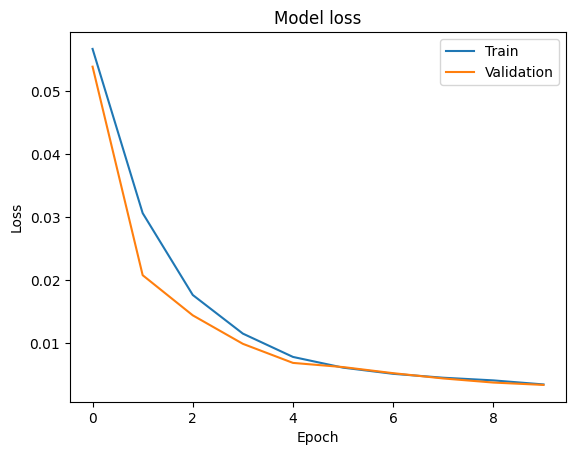

In [24]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [27]:
train_pred = autoencoder2.predict(train)

5/5 [==============================] - 44s 9s/step


In [28]:
psnr(train[70],train_pred[70])

28.315306294606486

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:28.315)')

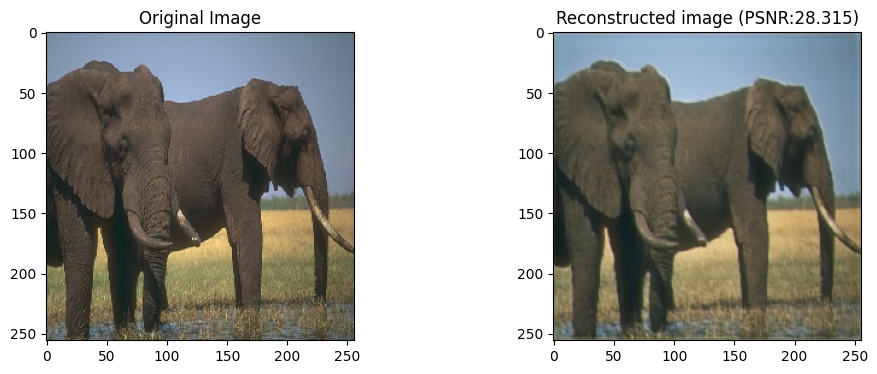

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:28.315)")

In [25]:
autoencoder2.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch2.h5')      # repo contains the weights of the model

In [30]:
test_pred= autoencoder2.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 30s 7s/step


In [31]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 25.214352874300435
MedianPSNR of test data: 25.205960779218138
Standard-DeviationPSNR of test data: 1.966782822215555


###Architecture 3: (8x8x128) : 8,192

In [32]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder3 = Model(input_img,decoded)
autoencoder3.compile(optimizer='adam', loss='mse')
autoencoder3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_36 (Conv2D)             (None, 256, 256, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_36[0][0]']              
                                )                                                           

In [ ]:
history= autoencoder3.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
19/19 [==============================] - 310s 15s/step - loss: 0.0672 - val_loss: 0.0418
Epoch 2/10
19/19 [==============================] - 290s 15s/step - loss: 0.0326 - val_loss: 0.0168
Epoch 3/10
19/19 [==============================] - 279s 15s/step - loss: 0.0161 - val_loss: 0.0132
Epoch 4/10
19/19 [==============================] - 290s 15s/step - loss: 0.0121 - val_loss: 0.0074
Epoch 5/10
19/19 [==============================] - 285s 15s/step - loss: 0.0083 - val_loss: 0.0059
Epoch 6/10
19/19 [==============================] - 290s 15s/step - loss: 0.0061 - val_loss: 0.0047
Epoch 7/10
19/19 [==============================] - 286s 15s/step - loss: 0.0047 - val_loss: 0.0038
Epoch 8/10
19/19 [==============================] - 287s 15s/step - loss: 0.0038 - val_loss: 0.0027
Epoch 9/10
19/19 [==============================] - 294s 16s/step - loss: 0.0029 - val_loss: 0.0024
Epoch 10/10
19/19 [==============================] - 285s 15s/step - loss: 0.0025 - val_loss: 0.0018

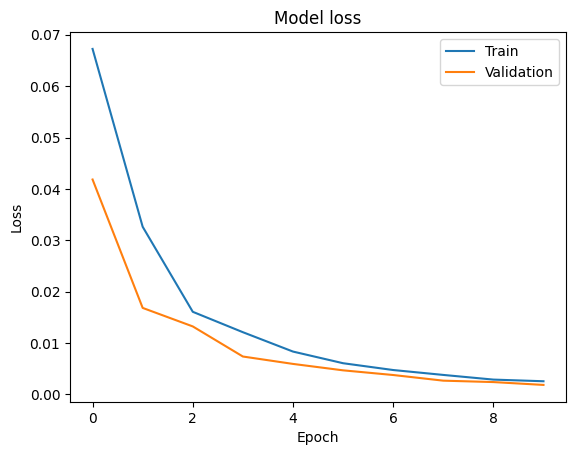

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [34]:
test_pred= autoencoder3.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 33s 7s/step


In [35]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 27.421504464291935
MedianPSNR of test data: 27.291355838536937
Standard-DeviationPSNR of test data: 2.356960850162462


In [33]:
autoencoder3.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch3.h5')      # repo contains the weights of the model

##Architecture 4: (32x32x64) : 65,536

In [36]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder4 = Model(input_img, decoded)
autoencoder4.compile(optimizer='adam', loss='mse')
autoencoder4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_52 (Conv2D)             (None, 256, 256, 32  896         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_52[0][0]']              
                                )                                                           

In [ ]:
history= autoencoder4.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 161s 12s/step - loss: 0.0576 - val_loss: 0.0377
Epoch 2/10
13/13 [==============================] - 126s 10s/step - loss: 0.0291 - val_loss: 0.0193
Epoch 3/10
13/13 [==============================] - 126s 10s/step - loss: 0.0165 - val_loss: 0.0117
Epoch 4/10
13/13 [==============================] - 130s 10s/step - loss: 0.0112 - val_loss: 0.0137
Epoch 5/10
13/13 [==============================] - 123s 10s/step - loss: 0.0085 - val_loss: 0.0075
Epoch 6/10
13/13 [==============================] - 126s 10s/step - loss: 0.0068 - val_loss: 0.0063
Epoch 7/10
13/13 [==============================] - 126s 10s/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/10
13/13 [==============================] - 128s 10s/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/10
13/13 [==============================] - 126s 10s/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/10
13/13 [==============================] - 126s 10s/step - loss: 0.0039 - val_loss: 0.0037

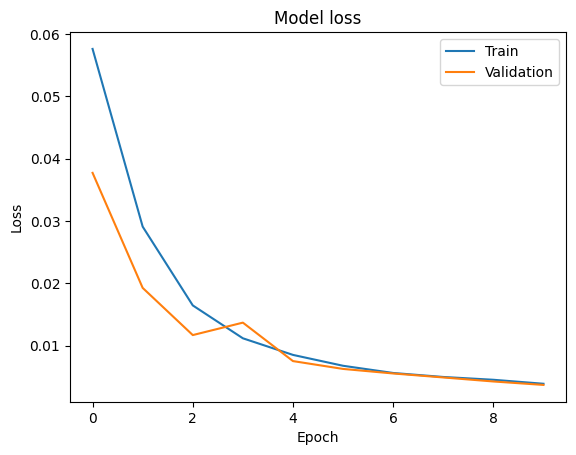

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [38]:
train_pred = autoencoder4.predict(train)

5/5 [==============================] - 54s 11s/step


In [39]:
psnr(train[70],train_pred[70])

28.55643547873423

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:28.556)')

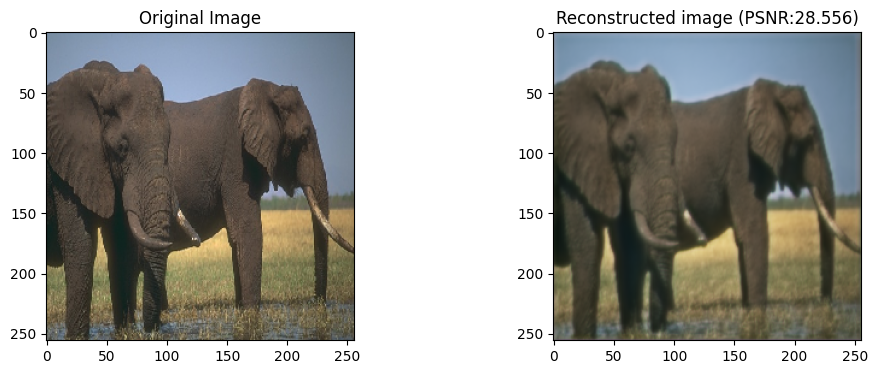

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:28.556)")

In [37]:
autoencoder4.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch4.h5')         # repo contains the weights of the model

In [41]:
test_pred= autoencoder4.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 29s 6s/step


In [42]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.593627221429525
MedianPSNR of test data: 24.223162506305435
Standard-DeviationPSNR of test data: 2.512470401085585


##Architecture 5: (32x32x32) : 32,768

In [43]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(32, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder5 = Model(input_img, decoded)
autoencoder5.compile(optimizer='adam', loss='mse')
autoencoder5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_62 (Conv2D)             (None, 256, 256, 32  896         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_63 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_62[0][0]']              
                                )                                                           

In [ ]:
history= autoencoder5.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 152s 11s/step - loss: 0.0628 - val_loss: 0.0491
Epoch 2/10
13/13 [==============================] - 117s 9s/step - loss: 0.0360 - val_loss: 0.0253
Epoch 3/10
13/13 [==============================] - 120s 9s/step - loss: 0.0225 - val_loss: 0.0210
Epoch 4/10
13/13 [==============================] - 120s 9s/step - loss: 0.0171 - val_loss: 0.0165
Epoch 5/10
13/13 [==============================] - 118s 9s/step - loss: 0.0118 - val_loss: 0.0109
Epoch 6/10
13/13 [==============================] - 120s 9s/step - loss: 0.0087 - val_loss: 0.0076
Epoch 7/10
13/13 [==============================] - 118s 9s/step - loss: 0.0070 - val_loss: 0.0070
Epoch 8/10
13/13 [==============================] - 118s 9s/step - loss: 0.0063 - val_loss: 0.0066
Epoch 9/10
13/13 [==============================] - 122s 9s/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/10
13/13 [==============================] - 119s 9s/step - loss: 0.0053 - val_loss: 0.0049


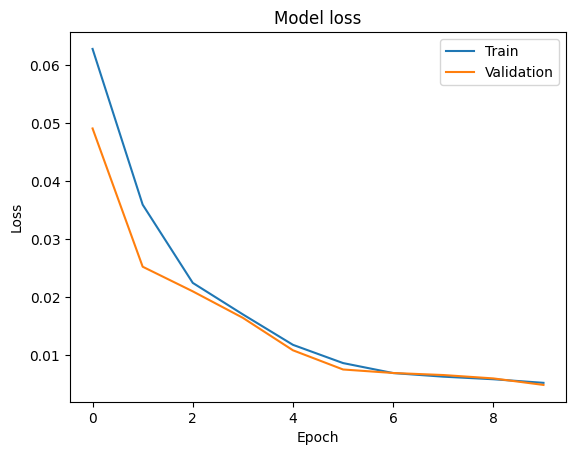

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [45]:
train_pred = autoencoder5.predict(train)

5/5 [==============================] - 48s 9s/step


In [46]:
psnr(train[70],train_pred[70])

27.46903732536451

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:27.469)')

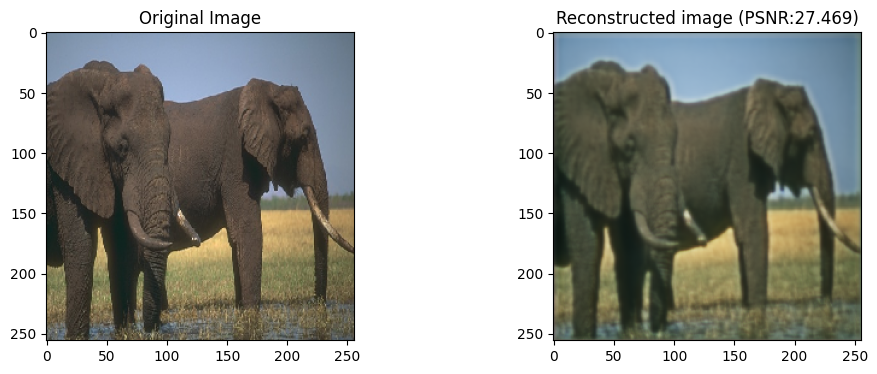

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:27.469)")

In [48]:
test_pred= autoencoder5.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 26s 5s/step


In [49]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.19900564148295
MedianPSNR of test data: 23.76040416615534
Standard-DeviationPSNR of test data: 2.3890211162743458


In [44]:
autoencoder5.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch5.h5')          # repo contains the weights of the model

##Architecture 6: (32x32x16) : 16,384

In [50]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(16, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder6 = Model(input_img, decoded)
autoencoder6.compile(optimizer='adam', loss='mse')
autoencoder6.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_72 (Conv2D)             (None, 256, 256, 32  896         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_73 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_72[0][0]']              
                                )                                                           

In [ ]:
history= autoencoder6.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 157s 11s/step - loss: 0.0623 - val_loss: 0.0532
Epoch 2/10
13/13 [==============================] - 119s 9s/step - loss: 0.0434 - val_loss: 0.0255
Epoch 3/10
13/13 [==============================] - 126s 10s/step - loss: 0.0226 - val_loss: 0.0191
Epoch 4/10
13/13 [==============================] - 116s 9s/step - loss: 0.0159 - val_loss: 0.0110
Epoch 5/10
13/13 [==============================] - 120s 9s/step - loss: 0.0108 - val_loss: 0.0092
Epoch 6/10
13/13 [==============================] - 117s 9s/step - loss: 0.0080 - val_loss: 0.0077
Epoch 7/10
13/13 [==============================] - 116s 9s/step - loss: 0.0069 - val_loss: 0.0067
Epoch 8/10
13/13 [==============================] - 116s 9s/step - loss: 0.0062 - val_loss: 0.0062
Epoch 9/10
13/13 [==============================] - 127s 10s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 10/10
13/13 [==============================] - 115s 9s/step - loss: 0.0052 - val_loss: 0.0049


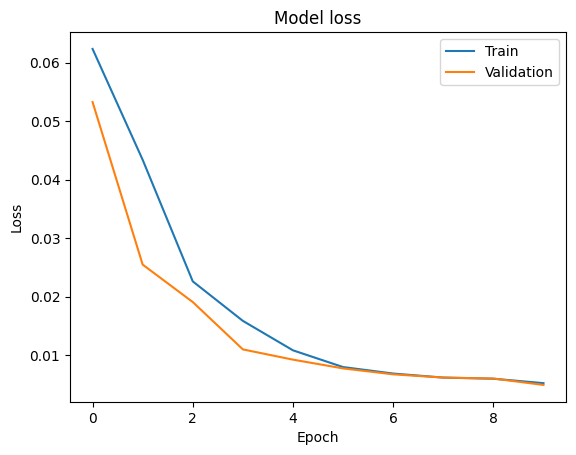

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [52]:
train_pred = autoencoder6.predict(train)

5/5 [==============================] - 50s 10s/step


In [53]:
psnr(train[70],train_pred[70])

28.610269927594977

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:28.610)')

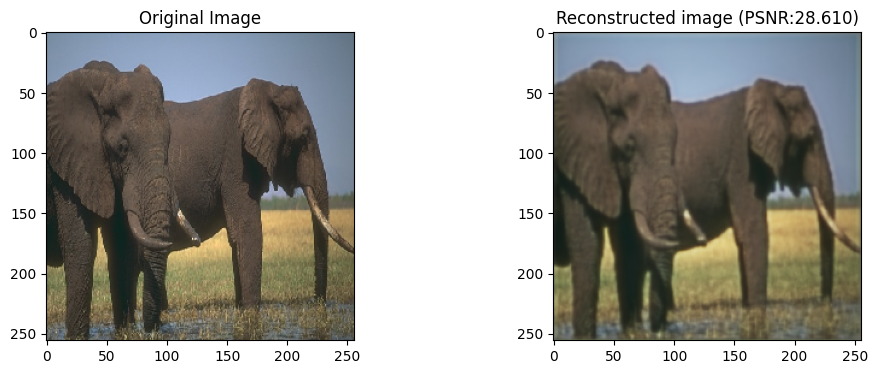

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:28.610)")

In [51]:
autoencoder6.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch6.h5')         # repo contains the weights of the model

In [55]:
test_pred= autoencoder6.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 33s 7s/step


In [56]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 25.029608819377298
MedianPSNR of test data: 24.56055468708262
Standard-DeviationPSNR of test data: 2.561167783141582


## Architecture 7: (32x32x8) : 8,192

In [57]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
# p1 = Dropout(0.3)(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# p2 = Dropout(0.3)(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(8, (3, 3), activation='relu', padding='same')(x3)
encoded = MaxPooling2D((2, 2), padding='same')(x3)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# This model maps an input to its reconstruction
autoencoder7 = Model(input_img, decoded)
autoencoder7.compile(optimizer='adam', loss='mse')
autoencoder7.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_82 (Conv2D)             (None, 256, 256, 32  896         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_83 (Conv2D)             (None, 256, 256, 32  9248        ['conv2d_82[0][0]']              
                                )                                                           

In [ ]:
history= autoencoder7.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 146s 11s/step - loss: 0.0551 - val_loss: 0.0653
Epoch 2/10
13/13 [==============================] - 114s 9s/step - loss: 0.0369 - val_loss: 0.0267
Epoch 3/10
13/13 [==============================] - 127s 10s/step - loss: 0.0224 - val_loss: 0.0189
Epoch 4/10
13/13 [==============================] - 116s 9s/step - loss: 0.0123 - val_loss: 0.0097
Epoch 5/10
13/13 [==============================] - 117s 9s/step - loss: 0.0086 - val_loss: 0.0090
Epoch 6/10
13/13 [==============================] - 114s 9s/step - loss: 0.0072 - val_loss: 0.0069
Epoch 7/10
13/13 [==============================] - 120s 9s/step - loss: 0.0060 - val_loss: 0.0060
Epoch 8/10
13/13 [==============================] - 121s 9s/step - loss: 0.0054 - val_loss: 0.0058
Epoch 9/10
13/13 [==============================] - 115s 9s/step - loss: 0.0049 - val_loss: 0.0046
Epoch 10/10
13/13 [==============================] - 115s 9s/step - loss: 0.0042 - val_loss: 0.0046


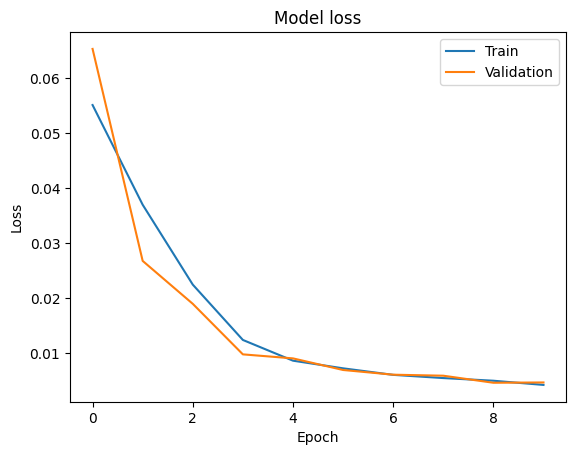

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [59]:
train_pred = autoencoder7.predict(train)

5/5 [==============================] - 53s 11s/step


In [60]:
psnr(train[70],train_pred[70])

28.430374881137087

original shape (256, 256, 3)


Text(0.5, 1.0, 'Reconstructed image (PSNR:28.430)')

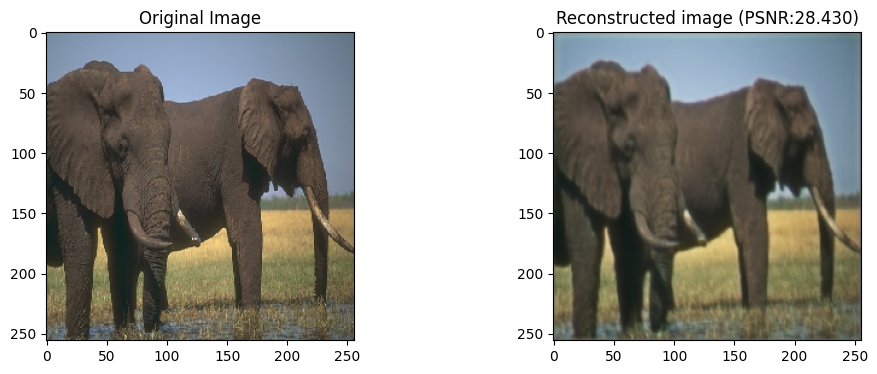

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
print("original shape", np.shape(train[70]))
ax[0].imshow(train[70])
ax[0].set_title("Original Image")

ax[1].imshow(train_pred[70])
ax[1].set_title("Reconstructed image (PSNR:28.430)")

In [58]:
autoencoder7.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch7.h5')          # repo contains the weights of the model

In [62]:
test_pred= autoencoder7.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 38s 8s/step


In [63]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.87347254965909
MedianPSNR of test data: 24.45903834528839
Standard-DeviationPSNR of test data: 2.503318053685134


### Architecture 8: 16x16x64

In [68]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder8 = Model(input_img,decoded)
autoencoder8.compile(optimizer='adam', loss='mse')
autoencoder8.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_118 (Conv2D)            (None, 256, 256, 32  896         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_119 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_118[0][0]']             
                                )                                                          

In [69]:
history= autoencoder8.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 251s 15s/step - loss: 0.0570 - val_loss: 0.0482
Epoch 2/10
13/13 [==============================] - 191s 15s/step - loss: 0.0457 - val_loss: 0.0257
Epoch 3/10
13/13 [==============================] - 200s 15s/step - loss: 0.0184 - val_loss: 0.0159
Epoch 4/10
13/13 [==============================] - 200s 15s/step - loss: 0.0113 - val_loss: 0.0091
Epoch 5/10
13/13 [==============================] - 200s 15s/step - loss: 0.0081 - val_loss: 0.0074
Epoch 6/10
13/13 [==============================] - 200s 15s/step - loss: 0.0069 - val_loss: 0.0064
Epoch 7/10
13/13 [==============================] - 200s 15s/step - loss: 0.0060 - val_loss: 0.0062
Epoch 8/10
13/13 [==============================] - 200s 15s/step - loss: 0.0053 - val_loss: 0.0051
Epoch 9/10
13/13 [==============================] - 200s 15s/step - loss: 0.0047 - val_loss: 0.0074
Epoch 10/10
13/13 [==============================] - 195s 15s/step - loss: 0.0048 - val_loss: 0.0042

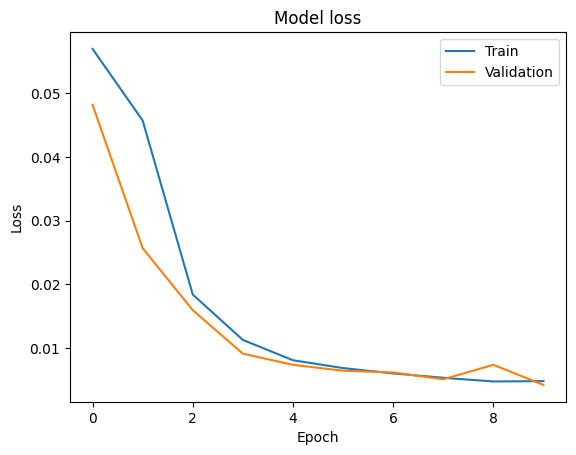

In [70]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [71]:
test_pred= autoencoder8.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 29s 7s/step


In [72]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.450826724546204
MedianPSNR of test data: 24.208986005532985
Standard-DeviationPSNR of test data: 2.4551730148753306


In [73]:
autoencoder8.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch8.h5')        # repo contains the weights of the model

### Architecture 9: 16x16x16

In [76]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(16, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder9 = Model(input_img,decoded)
autoencoder9.compile(optimizer='adam', loss='mse')
autoencoder9.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_144 (Conv2D)            (None, 256, 256, 32  896         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_145 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_144[0][0]']             
                                )                                                          

In [77]:
history= autoencoder9.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 210s 15s/step - loss: 0.0580 - val_loss: 0.0481
Epoch 2/10
13/13 [==============================] - 188s 14s/step - loss: 0.0356 - val_loss: 0.0249
Epoch 3/10
13/13 [==============================] - 189s 15s/step - loss: 0.0190 - val_loss: 0.0172
Epoch 4/10
13/13 [==============================] - 198s 15s/step - loss: 0.0134 - val_loss: 0.0130
Epoch 5/10
13/13 [==============================] - 188s 14s/step - loss: 0.0109 - val_loss: 0.0102
Epoch 6/10
13/13 [==============================] - 197s 15s/step - loss: 0.0089 - val_loss: 0.0081
Epoch 7/10
13/13 [==============================] - 188s 14s/step - loss: 0.0071 - val_loss: 0.0068
Epoch 8/10
13/13 [==============================] - 187s 14s/step - loss: 0.0062 - val_loss: 0.0060
Epoch 9/10
13/13 [==============================] - 188s 14s/step - loss: 0.0053 - val_loss: 0.0051
Epoch 10/10
13/13 [==============================] - 195s 15s/step - loss: 0.0047 - val_loss: 0.0050

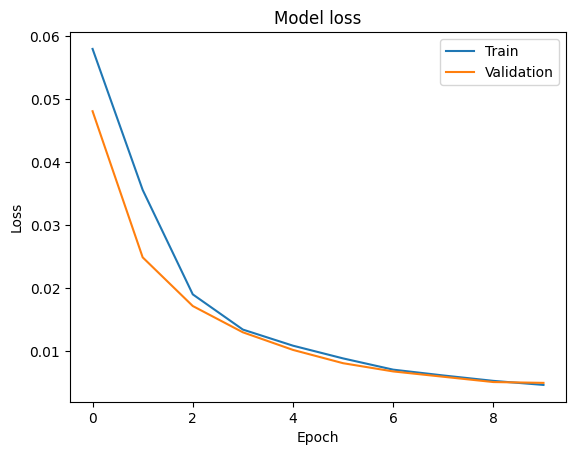

In [78]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [79]:
test_pred= autoencoder9.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 26s 6s/step


In [80]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 23.803680890336068
MedianPSNR of test data: 23.691341335830195
Standard-DeviationPSNR of test data: 2.259291661819805


In [81]:
autoencoder9.save_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch9.h5')           # repo contains the weights of the model

### Architecture 10: 16x16x8

In [82]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)    #learning even further
x4 = Conv2D(8, (3, 3), activation='relu', padding='same')(x4)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x4)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder10 = Model(input_img,decoded)
autoencoder10.compile(optimizer='adam', loss='mse')
autoencoder10.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_157 (Conv2D)            (None, 256, 256, 32  896         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_158 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_157[0][0]']             
                                )                                                          

In [ ]:
history= autoencoder10.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 186s 13s/step - loss: 0.0556 - val_loss: 0.0629
Epoch 2/10
13/13 [==============================] - 146s 11s/step - loss: 0.0411 - val_loss: 0.0298
Epoch 3/10
13/13 [==============================] - 148s 11s/step - loss: 0.0237 - val_loss: 0.0181
Epoch 4/10
13/13 [==============================] - 151s 12s/step - loss: 0.0156 - val_loss: 0.0148
Epoch 5/10
13/13 [==============================] - 155s 12s/step - loss: 0.0117 - val_loss: 0.0098
Epoch 6/10
13/13 [==============================] - 145s 11s/step - loss: 0.0083 - val_loss: 0.0081
Epoch 7/10
13/13 [==============================] - 145s 11s/step - loss: 0.0067 - val_loss: 0.0069
Epoch 8/10
13/13 [==============================] - 159s 12s/step - loss: 0.0062 - val_loss: 0.0059
Epoch 9/10
13/13 [==============================] - 146s 11s/step - loss: 0.0053 - val_loss: 0.0049
Epoch 10/10
13/13 [==============================] - 153s 12s/step - loss: 0.0045 - val_loss: 0.0049

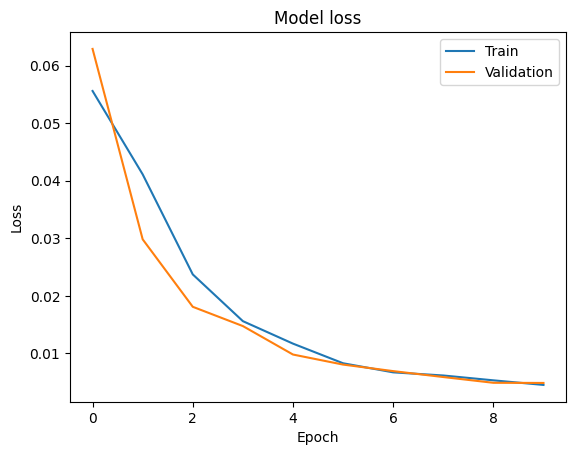

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [83]:
autoencoder10.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch10.h5')        # repo contains the weights of the model

In [84]:
test_pred= autoencoder10.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 26s 6s/step


In [85]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 24.844707635506285
MedianPSNR of test data: 24.427259798333736
Standard-DeviationPSNR of test data: 2.33677569143448


### Architecture 11: 8x8x64

In [86]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(64, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder11 = Model(input_img,decoded)
autoencoder11.compile(optimizer='adam', loss='mse')
autoencoder11.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_170 (Conv2D)            (None, 256, 256, 32  896         ['input_15[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_171 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_170[0][0]']             
                                )                                                          

In [ ]:
history= autoencoder11.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 246s 18s/step - loss: 0.0507 - val_loss: 0.0351
Epoch 2/10
13/13 [==============================] - 157s 12s/step - loss: 0.0254 - val_loss: 0.0204
Epoch 3/10
13/13 [==============================] - 158s 12s/step - loss: 0.0147 - val_loss: 0.0117
Epoch 4/10
13/13 [==============================] - 165s 13s/step - loss: 0.0097 - val_loss: 0.0086
Epoch 5/10
13/13 [==============================] - 156s 12s/step - loss: 0.0067 - val_loss: 0.0062
Epoch 6/10
13/13 [==============================] - 161s 13s/step - loss: 0.0054 - val_loss: 0.0051
Epoch 7/10
13/13 [==============================] - 154s 12s/step - loss: 0.0045 - val_loss: 0.0041
Epoch 8/10
13/13 [==============================] - 151s 12s/step - loss: 0.0037 - val_loss: 0.0034
Epoch 9/10
13/13 [==============================] - 152s 12s/step - loss: 0.0031 - val_loss: 0.0027
Epoch 10/10
13/13 [==============================] - 155s 12s/step - loss: 0.0026 - val_loss: 0.0025

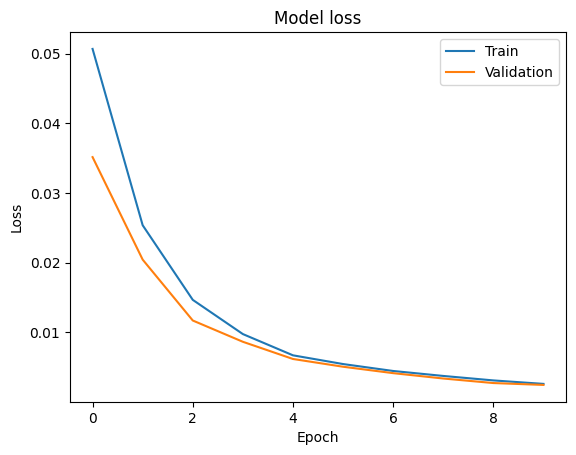

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [88]:
test_pred= autoencoder11.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 47s 10s/step


In [89]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 26.742738908171887
MedianPSNR of test data: 26.25726072822875
Standard-DeviationPSNR of test data: 2.389652153994678


In [87]:
autoencoder11.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch11.h5')       # repo contains the weights of the model

### Architecture 12: 8x8x16

In [90]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(16, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder12 = Model(input_img,decoded)
autoencoder12.compile(optimizer='adam', loss='mse')
autoencoder12.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_186 (Conv2D)            (None, 256, 256, 32  896         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_187 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_186[0][0]']             
                                )                                                          

In [ ]:
history= autoencoder12.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 210s 16s/step - loss: 0.0602 - val_loss: 0.0493
Epoch 2/10
13/13 [==============================] - 154s 12s/step - loss: 0.0349 - val_loss: 0.0222
Epoch 3/10
13/13 [==============================] - 168s 13s/step - loss: 0.0152 - val_loss: 0.0105
Epoch 4/10
13/13 [==============================] - 164s 13s/step - loss: 0.0084 - val_loss: 0.0079
Epoch 5/10
13/13 [==============================] - 159s 12s/step - loss: 0.0074 - val_loss: 0.0076
Epoch 6/10
13/13 [==============================] - 153s 12s/step - loss: 0.0070 - val_loss: 0.0066
Epoch 7/10
13/13 [==============================] - 164s 13s/step - loss: 0.0060 - val_loss: 0.0058
Epoch 8/10
13/13 [==============================] - 158s 12s/step - loss: 0.0053 - val_loss: 0.0052
Epoch 9/10
13/13 [==============================] - 157s 12s/step - loss: 0.0047 - val_loss: 0.0044
Epoch 10/10
13/13 [==============================] - 154s 12s/step - loss: 0.0042 - val_loss: 0.0036

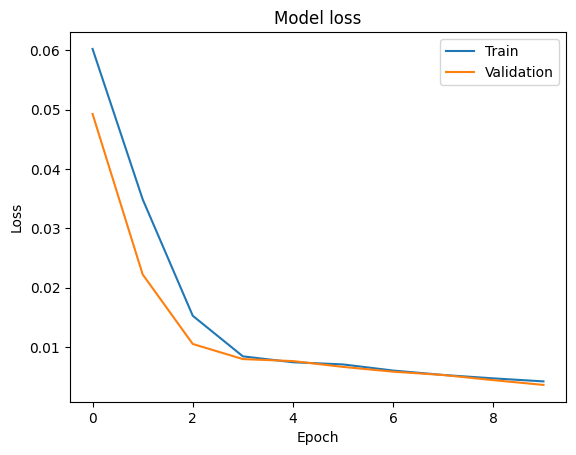

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [92]:
test_pred= autoencoder12.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 41s 8s/step


In [93]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 25.233136056430563
MedianPSNR of test data: 24.857919848804258
Standard-DeviationPSNR of test data: 2.4995455989024955


In [91]:
autoencoder12.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch12.h5')         # repo contains the weights of the model

### Architecture 13: 8x8x8

In [94]:
# Input layer for 256x256x3 images
input_img = Input(shape=(256, 256, 3))

# Encoder
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
p1 = MaxPooling2D((2, 2), padding='same')(x1)


x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
p2 = MaxPooling2D((2, 2), padding='same')(x2)


x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
p3 = MaxPooling2D((2, 2), padding='same')(x3)

x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same')(x4)
p4 = MaxPooling2D((2, 2), padding='same')(x4)

x5 = Conv2D(128, (3, 3), activation='relu', padding='same')(p4)
x5 = Conv2D(8, (3, 3), activation='relu', padding='same')(x5)

#bottleneck
encoded = MaxPooling2D((2, 2), padding='same')(x5)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x5], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x4], axis=-1)  # Adding skip connection
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x3], axis=-1)  # Adding skip connection
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x2], axis=-1)  # Adding skip connection
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = concatenate([x, x1], axis=-1)  # Adding skip connection
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder13 = Model(input_img,decoded)
autoencoder13.compile(optimizer='adam', loss='mse')
autoencoder13.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_202 (Conv2D)            (None, 256, 256, 32  896         ['input_17[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_203 (Conv2D)            (None, 256, 256, 32  9248        ['conv2d_202[0][0]']             
                                )                                                          

In [ ]:
history= autoencoder13.fit(train, train, epochs=10, batch_size=12, validation_data=(val, val))

Epoch 1/10
13/13 [==============================] - 187s 14s/step - loss: 0.0289 - val_loss: 0.0162
Epoch 2/10
13/13 [==============================] - 166s 13s/step - loss: 0.0089 - val_loss: 0.0058
Epoch 3/10
13/13 [==============================] - 163s 13s/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/10
13/13 [==============================] - 168s 13s/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/10
13/13 [==============================] - 173s 13s/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/10
13/13 [==============================] - 162s 13s/step - loss: 0.0028 - val_loss: 0.0026
Epoch 7/10
13/13 [==============================] - 168s 13s/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/10
13/13 [==============================] - 164s 13s/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/10
13/13 [==============================] - 172s 14s/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/10
13/13 [==============================] - 163s 13s/step - loss: 0.0018 - val_loss: 0.0018

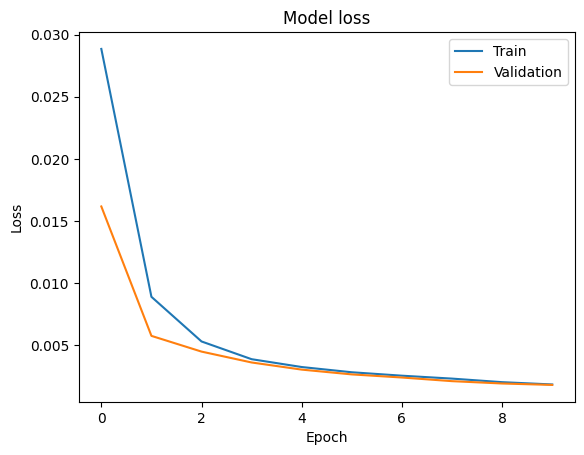

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [96]:
test_pred= autoencoder13.predict(test)
psnr_test=[]
for i in range(0,100):
  x= psnr(test[i],test_pred[i])
  psnr_test.append(x)

4/4 [==============================] - 31s 7s/step


In [97]:
import statistics

# Mean_test
mean_value = statistics.mean(psnr_test)
print(f"MeanPSNR of test data: {mean_value}")
# Median_test
median_value = statistics.median(psnr_test)
print(f"MedianPSNR of test data: {median_value}")
# Standard Deviation_test
std_deviation = np.std(psnr_test)
print(f"Standard-DeviationPSNR of test data: {std_deviation}")

MeanPSNR of test data: 25.646720459306703
MedianPSNR of test data: 25.393095243140174
Standard-DeviationPSNR of test data: 2.3791924761030527


In [95]:
autoencoder13.load_weights('/content/drive/MyDrive/Colab Notebooks/TryingDiffArch2/arch13.h5')       # repo contains the weights of the model